In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [4]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/leapgestrecog/leapGestRecog"

In [5]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [6]:
# shuffle the input data
import random
random.shuffle(image_data)

In [7]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [8]:
label[:10]

[3, 1, 4, 9, 0, 2, 0, 8, 3, 8]

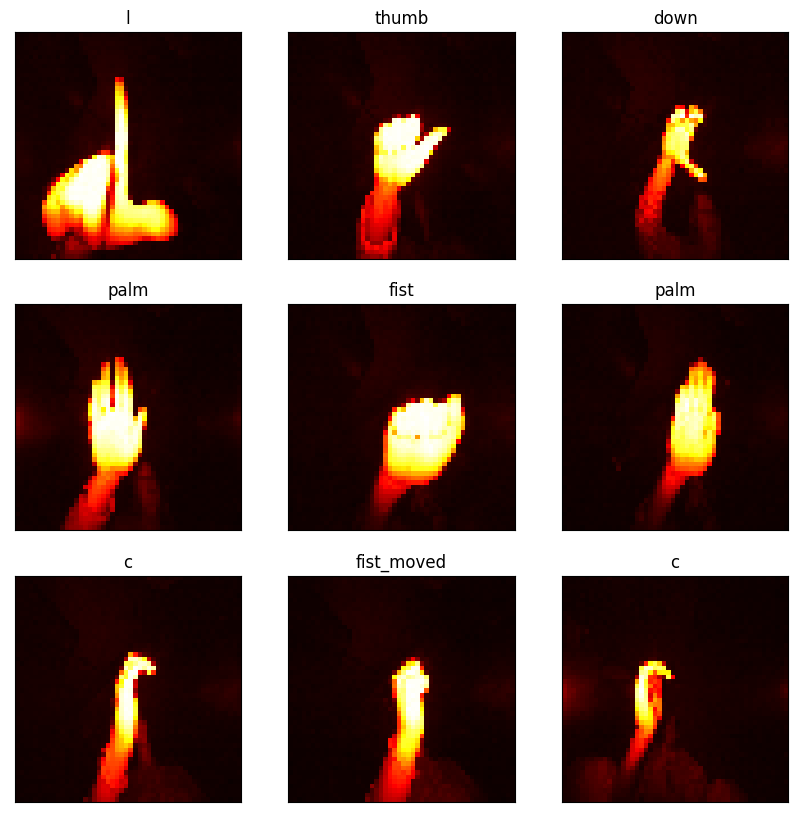

In [9]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [10]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [11]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int8)

In [12]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [13]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [14]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 67s 151ms/step - loss: 0.3469 - accuracy: 0.8849 - val_loss: 0.0151 - val_accuracy: 0.9960
Epoch 2/7
438/438 [==============================] - 65s 150ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0215 - val_accuracy: 0.9958
Epoch 3/7
438/438 [==============================] - 65s 149ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 4/7
438/438 [==============================] - 66s 150ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 7.2340e-04 - val_accuracy: 0.9995
Epoch 5/7
438/438 [==============================] - 66s 150ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 3.5221e-04 - val_accuracy: 1.0000
Epoch 6/7
438/438 [==============================] - 66s 150ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0029 - val_accuracy: 0.9988
Epoch 7/7
438/438 [==============================] - 66s 150ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 5.0662e-04 - v

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 6s 31ms/step - loss: 5.0662e-04 - accuracy: 0.9998
Test accuracy: 99.98%


In [17]:
original_w = model.get_weights()

In [18]:
num_layers=2

In [19]:
accuracys=[]
x=num_layers
for i in range(len(original_w)-2,len(original_w)-1-2*num_layers,-2):
  accuracy=[]
  print("Layer :",x)
  for scalar in [0.001,0.01,0.1,.5, .75,1.5,1.75,2.,4.]:
    new_w=[]
    for w in range(len(original_w)):
      if(w==i):
        new_w.append(original_w[w]*scalar)
      else:
        new_w.append(original_w[w])
    model.set_weights(new_w)
    evaluation = model.evaluate(X_test, y_test)
    print("Scallar {} --> test accuracy {}".format(scalar,evaluation[1]))
    accuracy.append(evaluation[1])
    model.set_weights(original_w)
  x-=1
  model.set_weights(original_w)
  accuracys.append(accuracy)

Layer : 2
188/188 [==============================] - 6s 29ms/step - loss: 2.2664 - accuracy: 0.3932
Scallar 0.001 --> test accuracy 0.3931666612625122
188/188 [==============================] - 6s 29ms/step - loss: 1.9545 - accuracy: 0.9997
Scallar 0.01 --> test accuracy 0.999666690826416
188/188 [==============================] - 6s 30ms/step - loss: 0.3274 - accuracy: 0.9998
Scallar 0.1 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 30ms/step - loss: 0.0010 - accuracy: 0.9998
Scallar 0.5 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 32ms/step - loss: 4.8231e-04 - accuracy: 0.9998
Scallar 0.75 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 30ms/step - loss: 6.7708e-04 - accuracy: 0.9998
Scallar 1.5 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 30ms/step - loss: 7.7247e-04 - accuracy: 0.9998
Scallar 1.75 --> test accuracy 0.999833345413208
188/18

In [20]:
average=[]
for i in accuracys:
  average.append(sum(i)/len(i))
print(average)

[0.9324074188868204, 0.8926296383142471]


In [21]:
scalars=[ .25, 0.5, .75, 0.9, 1.1,1.25,1.5,1.75,2.]

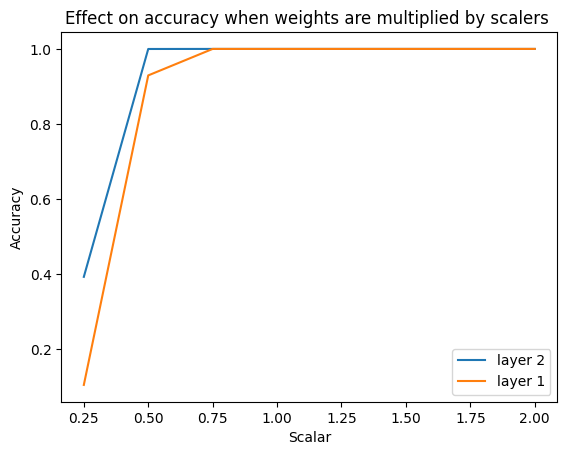

In [22]:
import matplotlib.pyplot as plt
for i in range(len(accuracys)):
  plt.plot(scalars, accuracys[i], label=f'layer {num_layers-i}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are multiplied by scalers ')
plt.legend()
plt.show()

In [23]:
accuracys=[]
x=num_layers
for i in range(len(original_w)-2,len(original_w)-1-2*num_layers,-2):
  accuracy=[]
  print("Layer :",x)
  for scalar in [0.001,0.01,0.1,.5, .75,1.5,1.75,2.,4.]:
    new_w=[]
    for w in range(len(original_w)):
      if(w==i):
        new_w.append(original_w[w]+scalar)
      else:
        new_w.append(original_w[w])
    model.set_weights(new_w)
    evaluation = model.evaluate(X_test, y_test)
    print("Scallar {} --> test accuracy {}".format(scalar,evaluation[1]))
    accuracy.append(evaluation[1])
    model.set_weights(original_w)
  x-=1
  model.set_weights(original_w)
  accuracys.append(accuracy)

Layer : 2
188/188 [==============================] - 5s 29ms/step - loss: 5.0661e-04 - accuracy: 0.9998
Scallar 0.001 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 29ms/step - loss: 5.0661e-04 - accuracy: 0.9998
Scallar 0.01 --> test accuracy 0.999833345413208
188/188 [==============================] - 5s 29ms/step - loss: 5.0662e-04 - accuracy: 0.9998
Scallar 0.1 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 31ms/step - loss: 5.0662e-04 - accuracy: 0.9998
Scallar 0.5 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 29ms/step - loss: 5.0660e-04 - accuracy: 0.9998
Scallar 0.75 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 29ms/step - loss: 5.0658e-04 - accuracy: 0.9998
Scallar 1.5 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 29ms/step - loss: 5.0666e-04 - accuracy: 0.9998
Scallar 1.75 --> test accuracy 0.9998333

In [24]:
average=[]
for i in accuracys:
  average.append(sum(i)/len(i))
print(average)

[0.999833345413208, 0.295777778658602]


In [25]:
scalars=[ .25, 0.5, .75, 0.9, 1.1,1.25,1.5,1.75,2.]

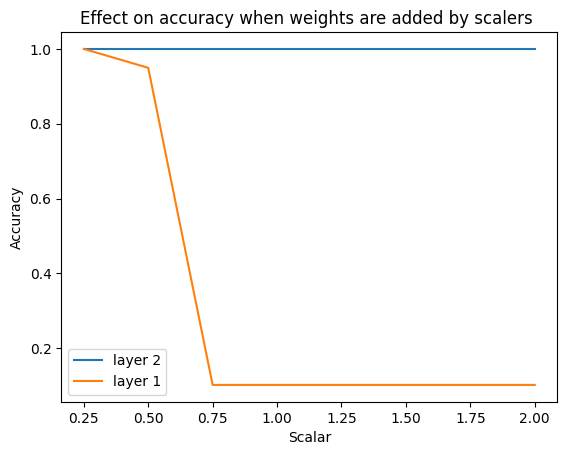

In [26]:
import matplotlib.pyplot as plt
for i in range(len(accuracys)):
  plt.plot(scalars, accuracys[i], label=f'layer {num_layers-i}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are added by scalers ')
plt.legend()
plt.show()